# Planar maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the map

In [50]:
A = np.array([
    [2, 1],
    [1, 1]
])

In [51]:
A

array([[2, 1],
       [1, 1]])

In [4]:
def planar_map(x_n, mat=A):
    return A @ x_n

Plot the phase space

In [53]:
np.linalg.eigvals(A)

array([2.61803399, 0.38196601])

In [67]:
eigvals, eigvec = np.linalg.eig(A)

In [68]:
eigvals

array([2.61803399, 0.38196601])

In [154]:
p = np.array([np.linspace(-15, 15, 11), np.linspace(-15, 15, 11)])

In [155]:
v1 = eigvec[:, 0] * p.T
v2 = eigvec[:, 1] * p.T

### Trajectories

In [179]:
ics = list()
ics.append(eigvec[:, 0] * 0.2)
ics.append(eigvec[:, 1] * 8)
ics.append(eigvec[:, 0] * -0.2)
ics.append(eigvec[:, 1] * -8)
ics.append(np.array([-7, 9.5]))
ics.append(np.array([-5, 9.5]))
ics.append(np.array([7, -9.5]))
ics.append(np.array([5, -9.5]))

In [180]:
number_its = 100
trajs = list()

for ic in ics:
    temp_traj = list()
    temp_traj.append(ic)
    prev_it = ic
    for _ in range(number_its):
        temp_traj.append(planar_map(prev_it))
        prev_it = temp_traj[-1]
        
        # break to stop explosions
        if np.linalg.norm(temp_traj[-1]) > 100:
            break
            
        # break to stop explosions
        if np.linalg.norm(temp_traj[-1]) < 1e-5:
            break
    
    trajs.append(temp_traj)

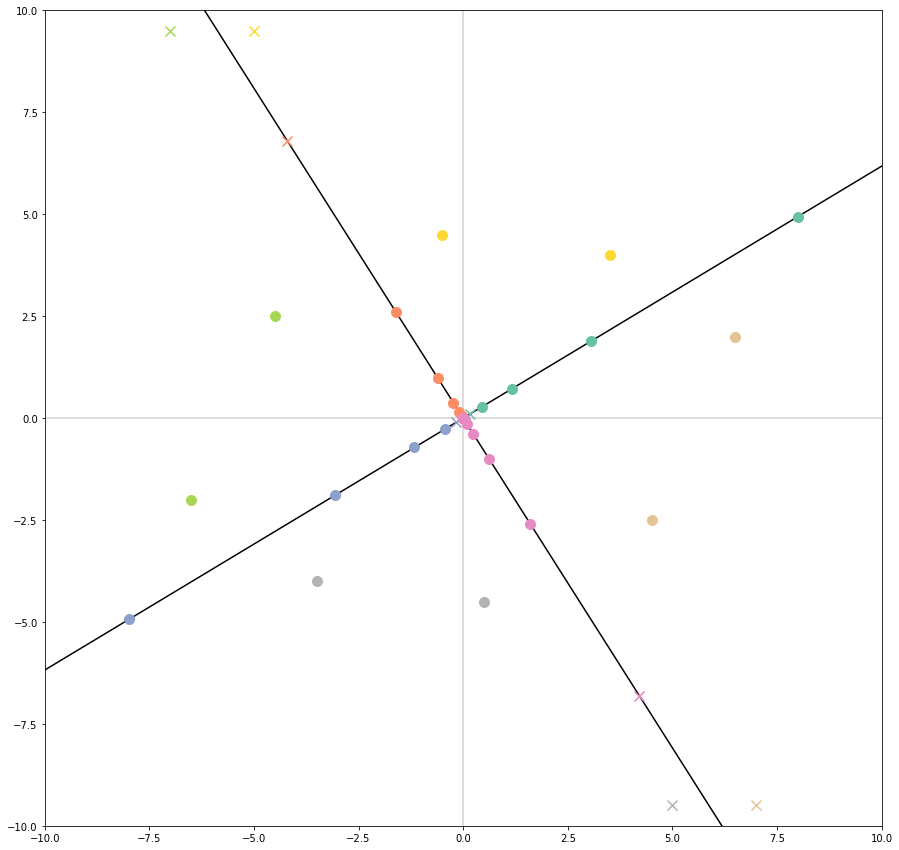

In [181]:
fig, ax = plt.subplots(figsize=(15, 15))
# plot axis
ax.hlines(0, -10, 10, color='lightgrey')
ax.vlines(0, -10, 10, color='lightgrey')

# plot eigan directions
ax.plot(v1[:, 0], v1[:, 1], color='black', zorder=1)
ax.plot(v2[:, 0], v2[:, 1], color='black', zorder=1)

for i, t in enumerate(trajs):
    ax.scatter(*t[0], s=100, marker='x', color=plt.get_cmap('Set2')(i), zorder=2)
    for s in t[1:]:
        ax.scatter(*s, s=100, color=plt.get_cmap('Set2')(i), zorder=2)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()